In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, f1_score, accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(6,6)

sns.set()
sns.set(style="darkgrid")

In [2]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data[:2]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0


In [4]:
data.shape

(10000, 14)

In [5]:
 data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [6]:
data.describe(include = object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Univariate and Bivariate Analysis

In [8]:
# Statistical analysis(perform corr, annova)

##### Data Prepocessing


In [9]:
# 1. Check for the missing values


In [10]:
#2. Check for the outliers

In [11]:
# 3. Feature Selection
data[:2]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0


In [12]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
#Drop Row Number, Customer ID, Surname
data.drop(columns = ['RowNumber','CustomerId', 'Surname'], inplace = True)

# We might think that why Customer ID is being deleted.
# In logging the details of the customers we will be needed the customer iD in excel 
# To fit a model customer ID is not needed for model prediction

In [14]:
# Gender and Geography are the only categorical columns so encode it.

In [15]:
# train test split
y = data['Exited']
x = data.drop(columns = 'Exited')

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size= 0.9, random_state=3, stratify = y)

In [17]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(9000, 10) (1000, 10) (9000,) (1000,)


In [18]:
#Note: Encoding and Scaling MUST be done TRAIN TEST SPLIT

##### fREQUENCY ENCODING FOR Geography

In [19]:
xtrain['Geography'].value_counts()

Geography
France     4522
Germany    2255
Spain      2223
Name: count, dtype: int64

In [20]:
geo_encoding = xtrain['Geography'].value_counts().to_dict()

In [21]:
# run it only one time.
xtrain['Geography'] = xtrain['Geography'].map(geo_encoding)
xtest['Geography'] = xtest['Geography'].map(geo_encoding)

In [22]:
xtrain.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6904,744,2255,Male,29,6,123737.040000,2,1,0,141558.040000
314,744,2223,Male,36,2,153804.440000,1,1,1,87213.330000


In [23]:
#Dummy Encoding for Gender
#Run it one time
xtrain = pd.get_dummies(xtrain, drop_first=True, dtype = int)
xtest = pd.get_dummies(xtest, drop_first=True, dtype = int)

In [24]:
xtrain.shape

(9000, 10)

In [25]:
xtest.shape

(1000, 10)

In [26]:
xtrain.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
6904,744,2255,29,6,123737.040000,2,1,0,141558.040000,1
314,744,2223,36,2,153804.440000,1,1,1,87213.330000,1
2963,655,4522,51,3,0.000000,2,0,1,15801.020000,0
4274,502,2255,42,0,132002.700000,1,0,1,28204.980000,0
3206,515,2255,60,9,113715.360000,1,1,0,18424.240000,1


# Predictive Modeling

In [27]:
# This funtion will fit and also validate the model
accu = []
recl = []
prec = []
f1 = []
model_name = []   # why outside the function if inside the function then every time we call it will be new so we have treated global variables
def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model                  #creating an instance
    m.fit(xtrain, ytrain)    #fit the model
    pred_h = m.predict(xtest)  #hard prediction
    pred_s = m.predict_proba(xtest)[:,1]
    print("Classification Report\n:", classification_report(ytest, pred_h))
    
    fpr, tpr, thre = roc_curve(ytest, pred_s)
    plt.plot([0,1],[0,1], ls = '--', color = 'red')
    plt.plot(fpr, tpr)
    plt.show()
    
    response = input("Do you want to keept this model? Type Yes:")
    if response.lower()== 'yes':
        model_name.append(str(m))
        accu.append(accuracy_score(ytest, pred_h))
        recl.append(recall_score(ytest, pred_h))
        prec.append(precision_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        global df_score
        df_score = pd.DataFrame({'Model': model_name, 'Accuracy': accu,
                                'Recall':recl, 'Precision': prec, "F1 Score": f1})
        return m
                  

#### Decision Tree

Classification Report
:               precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.78      0.38      0.51       204

    accuracy                           0.85      1000
   macro avg       0.82      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



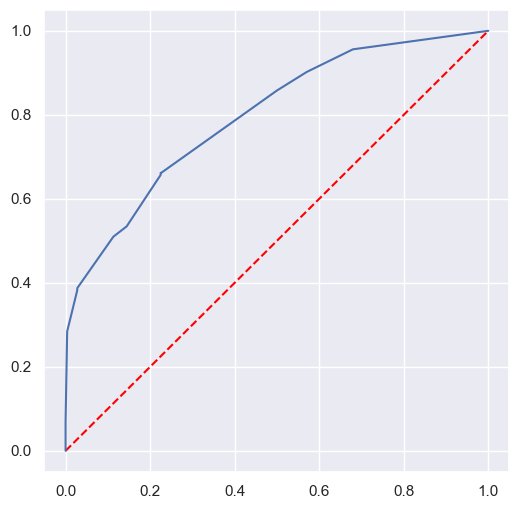

Do you want to keept this model? Type Yes:


In [28]:
dt=model_validation(DecisionTreeClassifier(max_depth = 4),xtrain, ytrain, xtest, ytest)

### naive bayes

Classification Report
:               precision    recall  f1-score   support

           0       0.80      0.96      0.87       796
           1       0.35      0.09      0.14       204

    accuracy                           0.78      1000
   macro avg       0.57      0.52      0.51      1000
weighted avg       0.71      0.78      0.72      1000



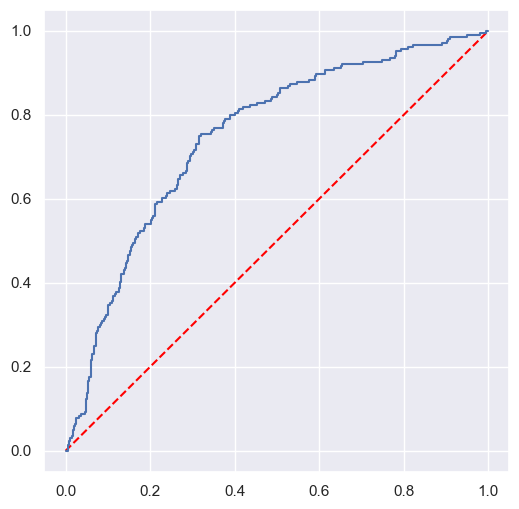

Do you want to keept this model? Type Yes:


In [29]:
nb = model_validation(GaussianNB(),xtrain,ytrain,xtest,ytest)

### Random forest

Classification Report
:               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.43      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



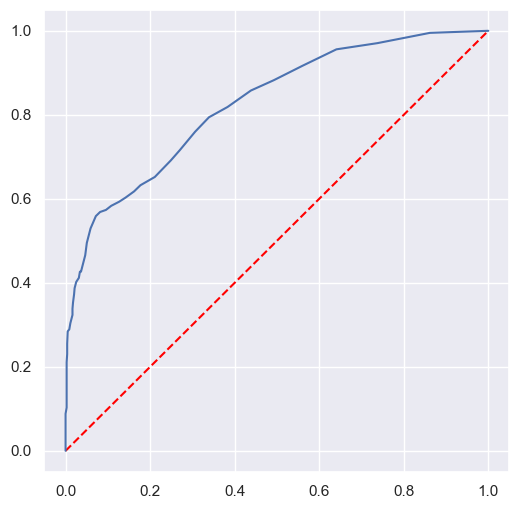

Do you want to keept this model? Type Yes:yes


In [30]:
rf= model_validation(RandomForestClassifier(n_estimators=50),xtrain,ytrain,xtest,ytest)

In [31]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier(n_estimators=50),0.854000,0.426471,0.750000,0.543750


### Adaboost classifier

Classification Report
:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.73      0.47      0.57       204

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



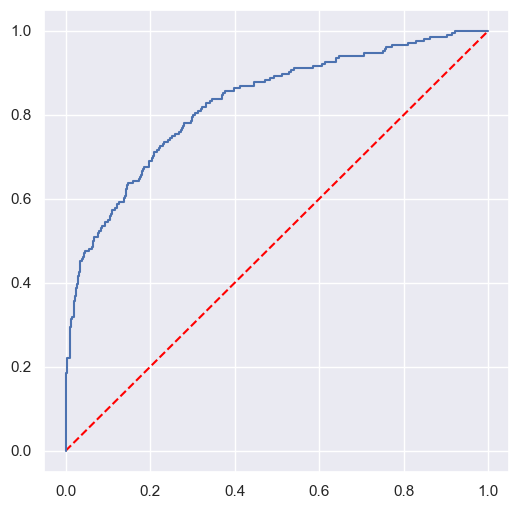

Do you want to keept this model? Type Yes:yes


In [32]:
ada=model_validation(AdaBoostClassifier(n_estimators=100),xtrain,ytrain,xtest,ytest)

### Gradient Bossting Classifier

Classification Report
:               precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.42      0.53       204

    accuracy                           0.84      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.84      0.83      1000



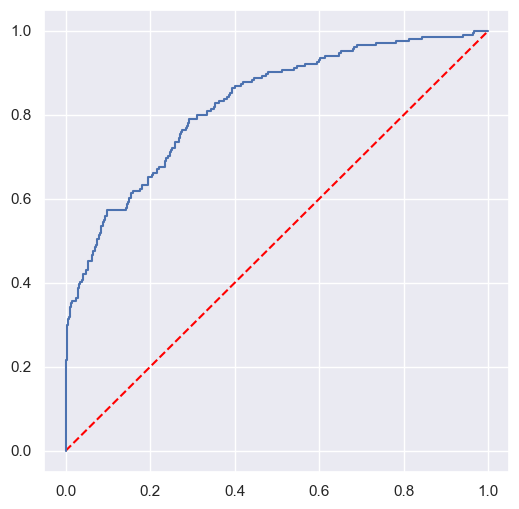

Do you want to keept this model? Type Yes:yes


In [33]:
gbc=model_validation(GradientBoostingClassifier(n_estimators=150,max_depth=9),xtrain,ytrain,xtest,ytest)

### XG boosting Classifier

Classification Report
:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.48      0.57       204

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



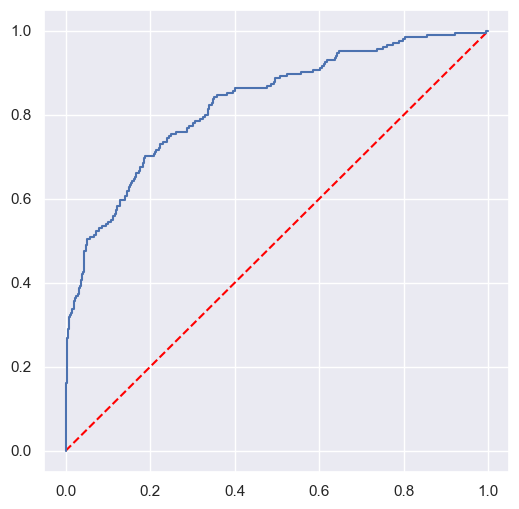

Do you want to keept this model? Type Yes:yes


In [34]:
xg=model_validation(XGBClassifier(n_estimators=100,max_depth=10),xtrain,ytrain,xtest,ytest)

### Voting

Classification Report
:               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.76      0.43      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.85      0.85      0.84      1000



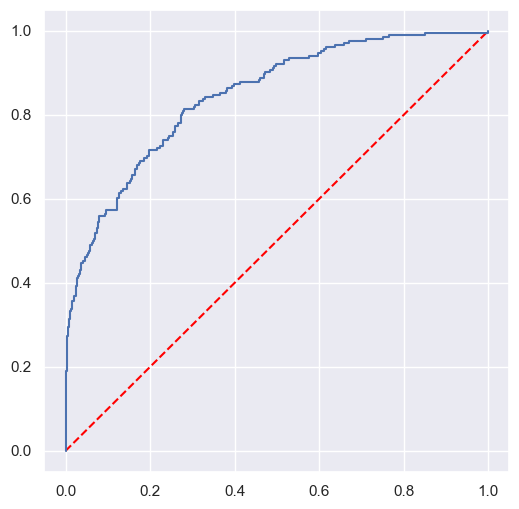

Do you want to keept this model? Type Yes:yes


In [35]:
#Voting

base_models = [('dt',DecisionTreeClassifier(max_depth=8)),
              ('rf',RandomForestClassifier(n_estimators=150,max_depth=13)),
              ('ada',AdaBoostClassifier(n_estimators=200)),
              ('gbc',GradientBoostingClassifier(n_estimators=150,max_depth=10))] 
voting = model_validation(VotingClassifier(estimators=base_models,voting = 'soft'),
                         xtrain,ytrain,xtest,ytest)

In [36]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier(n_estimators=50),0.854000,0.426471,0.750000,0.543750
1,AdaBoostClassifier(n_estimators=100),0.856000,0.470588,0.727273,0.571429
2,"GradientBoostingClassifier(max_depth=9, n_esti...",0.845000,0.421569,0.699187,0.525994
3,"XGBClassifier(base_score=None, booster=None, c...",0.856000,0.475490,0.723881,0.573964
4,"VotingClassifier(estimators=[('dt', DecisionTr...",0.855000,0.426471,0.756522,0.545455


#### Stacking

Classification Report
:               precision    recall  f1-score   support

           0       0.87      0.94      0.91       796
           1       0.67      0.46      0.54       204

    accuracy                           0.84      1000
   macro avg       0.77      0.70      0.73      1000
weighted avg       0.83      0.84      0.83      1000



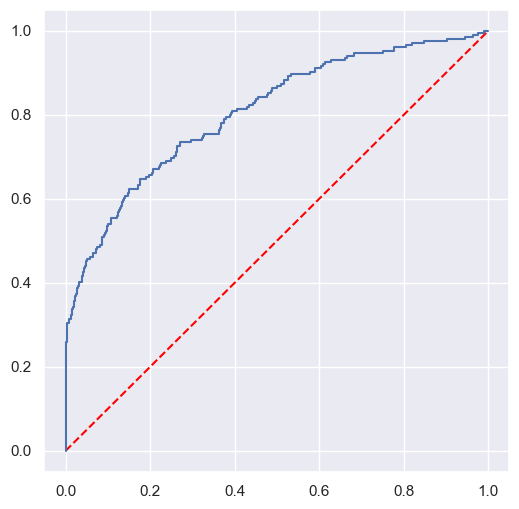

Do you want to keept this model? Type Yes:yes


In [37]:
stacking = model_validation(StackingClassifier(estimators=base_models,final_estimator=XGBClassifier(n_estimators = 150,max_depth = 10)),
                                              xtrain,ytrain,xtest,ytest)

In [38]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier(n_estimators=50),0.854000,0.426471,0.750000,0.543750
1,AdaBoostClassifier(n_estimators=100),0.856000,0.470588,0.727273,0.571429
2,"GradientBoostingClassifier(max_depth=9, n_esti...",0.845000,0.421569,0.699187,0.525994
3,"XGBClassifier(base_score=None, booster=None, c...",0.856000,0.475490,0.723881,0.573964
4,"VotingClassifier(estimators=[('dt', DecisionTr...",0.855000,0.426471,0.756522,0.545455
5,"StackingClassifier(estimators=[('dt', Decision...",0.843000,0.460784,0.666667,0.544928


## Fine Tuning XG Boost

In [44]:
grid={'n_estimators':[100,150,200,250,300,350],
     'gama':[0,1,2,3],
     'max_depth':[7,10,13,16,19]}

In [45]:
gscv_xgb = GridSearchCV(estimator=XGBClassifier(),param_grid=grid,scoring='recall',cv=5,verbose=1)

In [46]:
gscv_xgb.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gama': [0, 1, 2, 3], 'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='recall', verbose=1)

In [48]:
gscv_xgb.best_score_

0.5019014011107636

In [50]:
gscv_xgb.best_params_

{'gama': 0, 'max_depth': 16, 'n_estimators': 350}

In [47]:
## Feature selection

In [ ]:
## Final Model

Classification Report
:               precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.45      0.53       204

    accuracy                           0.84      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000



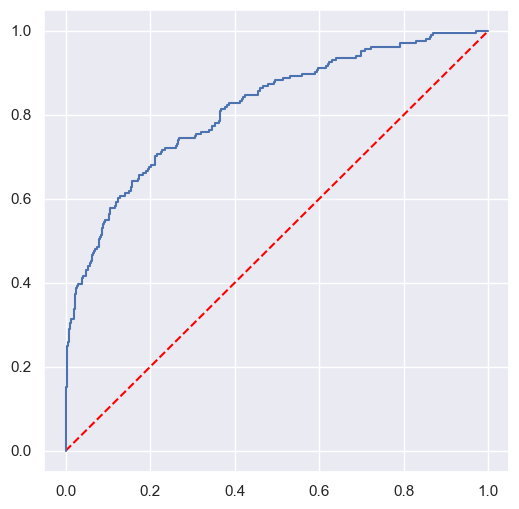

Do you want to keept this model? Type Yes:yes


In [52]:
final_model = model_validation(XGBClassifier(**gscv_xgb.best_params_),
                              xtrain, ytrain,xtest,ytest)

In [53]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier(n_estimators=50),0.854000,0.426471,0.750000,0.543750
1,AdaBoostClassifier(n_estimators=100),0.856000,0.470588,0.727273,0.571429
2,"GradientBoostingClassifier(max_depth=9, n_esti...",0.845000,0.421569,0.699187,0.525994
3,"XGBClassifier(base_score=None, booster=None, c...",0.856000,0.475490,0.723881,0.573964
4,"VotingClassifier(estimators=[('dt', DecisionTr...",0.855000,0.426471,0.756522,0.545455
5,"StackingClassifier(estimators=[('dt', Decision...",0.843000,0.460784,0.666667,0.544928
6,"XGBClassifier(base_score=None, booster=None, c...",0.840000,0.450980,0.657143,0.534884


### prediction

In [54]:
geo_encoding

{'France': 4522, 'Germany': 2255, 'Spain': 2223}

In [55]:
final_model.predict(([[675,4522,35,4,12000,2,1,0,60000,0]]))[0]

0

In [57]:
final_model.predict([[679,2248,24,3,12000,2,1,1,43000,0]])[0]

0

In [56]:
import pickle
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)

In [58]:
### Save the fitted model